In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('big_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6807 non-null   int64  
 1   INJURY_BAD           6807 non-null   float64
 2   HELMET_USED          6807 non-null   float64
 3   age_bins             6807 non-null   object 
 4   SAFE_PEDAL_ACTION    6807 non-null   object 
 5   PROTECTIVE_CLOTHING  6807 non-null   float64
 6   SAFE_LOCATION        6807 non-null   float64
 7   WEATHER_CAT          6807 non-null   object 
 8   road_surf_bins       6807 non-null   object 
 9   DAYTIME              6807 non-null   int64  
 10  SPEED_RATING         6807 non-null   object 
 11  physical_bins        6807 non-null   object 
 12  hour_bins            6807 non-null   object 
 13  SEX                  6807 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 744.6+ KB


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INJURY_BAD           6807 non-null   float64
 1   HELMET_USED          6807 non-null   float64
 2   age_bins             6807 non-null   object 
 3   SAFE_PEDAL_ACTION    6807 non-null   object 
 4   PROTECTIVE_CLOTHING  6807 non-null   float64
 5   SAFE_LOCATION        6807 non-null   float64
 6   WEATHER_CAT          6807 non-null   object 
 7   road_surf_bins       6807 non-null   object 
 8   DAYTIME              6807 non-null   int64  
 9   SPEED_RATING         6807 non-null   object 
 10  physical_bins        6807 non-null   object 
 11  hour_bins            6807 non-null   object 
 12  SEX                  6807 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 691.5+ KB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
y = df['INJURY_BAD']
X = df.drop('INJURY_BAD',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)

In [10]:
dt = DecisionTreeClassifier(max_depth=25,random_state=312)
dt.fit(X_train_encoded,y_train)

DecisionTreeClassifier(max_depth=25, random_state=312)

In [11]:
y_train_pred = dt.predict(X_train_encoded)
y_test_pred = dt.predict(X_test_encoded)

from sklearn.metrics import precision_score,recall_score

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.9714285714285714
Test Precision: 0.16981132075471697
Train Recall: 0.29772329246935203
Test Recall: 0.06428571428571428


In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plt.figure(figsize=(16, 12))
#plot_tree(dt, filled=True)
#plt.show()

In [13]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(random_state=312)
X_u, y_u = under.fit_resample(X_train_encoded,y_train)

In [14]:
dt = DecisionTreeClassifier(max_depth=5,random_state=312)
dt.fit(X_u,y_u)

DecisionTreeClassifier(max_depth=5, random_state=312)

In [15]:
y_train_pred = dt.predict(X_u)
y_test_pred = dt.predict(X_test_encoded)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.648936170212766
Test Precision: 0.1469387755102041
Train Recall: 0.5341506129597198
Test Recall: 0.5142857142857142


In [16]:
#plt.figure(figsize=(16, 12))
#plot_tree(dt, filled=True)
#plt.show()

In [17]:
importances = list(dt.feature_importances_)

In [18]:
xu_df = pd.DataFrame(X_u.todense(),columns=ohe.get_feature_names())

In [19]:
names = list(xu_df.columns)

In [20]:
importance_names = dict(zip(names,importances))

In [21]:
importance_names

{'x0_0.0': 0.0,
 'x0_1.0': 0.017502530780269056,
 'x1_Adolescent': 0.06361666415138392,
 'x1_Adult': 0.012342529861704211,
 'x1_Elderly': 0.05698601281454696,
 'x1_Middle-aged': 0.020147175388687003,
 'x2_Neutral': 0.04210997531359186,
 'x2_Safe': 0.05453729090761077,
 'x2_Unsafe': 0.03556684797200369,
 'x3_0.0': 0.04313622398894781,
 'x3_1.0': 0.0,
 'x4_0.0': 0.0,
 'x4_1.0': 0.09229788952376865,
 'x5_Adverse Weather': 0.0,
 'x5_Clear Weather': 0.0,
 'x6_Dry': 0.0,
 'x6_Other': 0.0,
 'x6_Snow': 0.0,
 'x6_Wet': 0.02205624155013554,
 'x7_0': 0.03430895606348335,
 'x7_1': 0.0,
 'x8_Above Average Speed': 0.06428809116954182,
 'x8_Average Speed': 0.014071183560429081,
 'x8_Below Average Speed': 0.0,
 'x9_Impaired': 0.0,
 'x9_Normal': 0.2024934076156852,
 'x9_Other': 0.05323015063289957,
 'x9_Shaken': 0.0,
 'x10_Afternoon': 0.01267441166288647,
 'x10_Early Morning': 0.027146618282816202,
 'x10_Morning': 0.02327442016927178,
 'x10_Night': 0.06709303465769806,
 'x11_F': 0.0,
 'x11_M': 0.041120

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
X_train_df = pd.DataFrame(X_train_encoded.todense(),columns=ohe.get_feature_names())
X_test_df = pd.DataFrame(X_test_encoded.todense(),columns=ohe.get_feature_names())
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

In [24]:
log_model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=312)

In [25]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=312)

In [26]:
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')


Train Precision: 0.15242616033755274
Test Precision: 0.17516629711751663
Train Recall: 0.5061295971978984
Test Recall: 0.5642857142857143


In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200,max_depth=4,random_state=312)
clf.fit(X_u,y_u)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=312)

In [28]:
y_train_pred = clf.predict(X_u)
y_test_pred = clf.predict(X_test_encoded)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.6979405034324943
Test Precision: 0.18161434977578475
Train Recall: 0.5341506129597198
Test Recall: 0.5785714285714286


In [29]:
from sklearn.ensemble import VotingClassifier

avg = VotingClassifier(estimators=[('dt',dt),('clf',clf)])
avg.fit(X_u,y_u)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=312)),
                             ('clf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200,
                                                     random_state=312))])

In [30]:
y_train_pred = avg.predict(X_u)
y_test_pred = avg.predict(X_test_encoded)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.7337110481586402
Test Precision: 0.1884498480243161
Train Recall: 0.45359019264448336
Test Recall: 0.44285714285714284


In [31]:
from sklearn.metrics import precision_recall_curve, auc

y_score = log_model.decision_function(X_test_scaled)
precision,recall,thresholds = precision_recall_curve(y_test,y_score)
print('AUC: {}'.format(auc(recall, precision)))

AUC: 0.20049885134291154


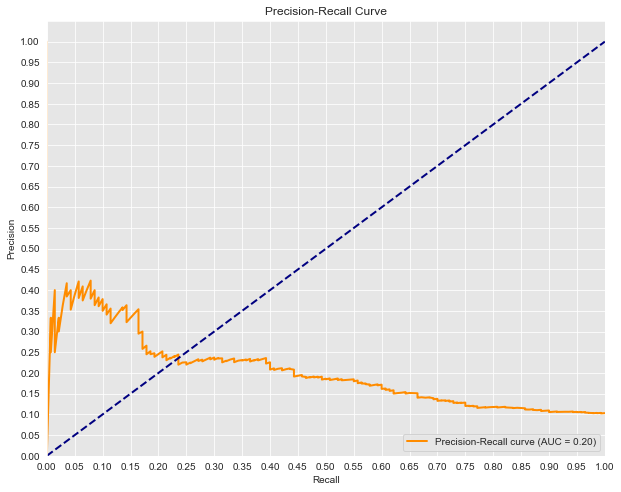

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot a Precision-Recall Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (AUC = 0.20)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

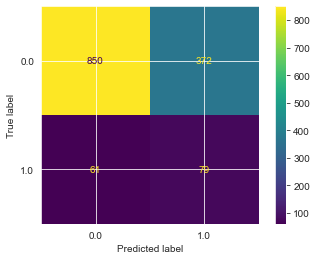

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model,X_test_scaled,y_test);

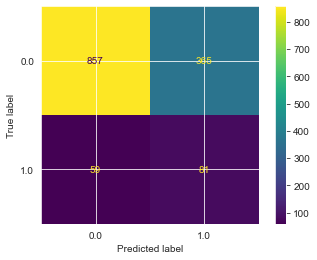

In [34]:
plot_confusion_matrix(clf,X_test_encoded,y_test);

In [35]:
coef_dict = {}
for coef, feat in zip(log_model.coef_[0,:],X_train_df.columns):
    coef_dict[feat] = coef
for i,v in coef_dict.items():
    coef_dict[i] = round(v,2)
coef_dict

{'x0_0.0': 0.0,
 'x0_1.0': -0.0,
 'x1_Adolescent': -0.17,
 'x1_Adult': -0.17,
 'x1_Elderly': 0.3,
 'x1_Middle-aged': 0.04,
 'x2_Neutral': 0.04,
 'x2_Safe': -0.13,
 'x2_Unsafe': 0.09,
 'x3_0.0': 0.01,
 'x3_1.0': -0.01,
 'x4_0.0': 0.14,
 'x4_1.0': -0.14,
 'x5_Adverse Weather': 0.35,
 'x5_Clear Weather': -0.35,
 'x6_Dry': 0.78,
 'x6_Other': -0.88,
 'x6_Snow': -0.12,
 'x6_Wet': 0.22,
 'x7_0': -0.06,
 'x7_1': 0.06,
 'x8_Above Average Speed': 0.17,
 'x8_Average Speed': -0.01,
 'x8_Below Average Speed': -0.16,
 'x9_Impaired': 0.12,
 'x9_Normal': -0.67,
 'x9_Other': -0.12,
 'x9_Shaken': 0.67,
 'x10_Afternoon': -0.21,
 'x10_Early Morning': 0.12,
 'x10_Morning': -0.07,
 'x10_Night': 0.17,
 'x11_F': -0.22,
 'x11_M': -0.46,
 'x11_X': 0.68}

In [36]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#    'penalty': ['l1', 'l2', 'elasticnet'],
#    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#}

#grid_search = GridSearchCV(log_model, param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#
# Get the best hyperparameters and score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

# Train a new Logistic Regression model with the best hyperparameters
#logreg_best = LogisticRegression(random_state=312, **best_params)
#logreg_best.fit(X_train_scaled, y_train)

# Obtain predictions on the test set
#y_pred = logreg_best.predict(X_test_scaled)

In [37]:
# Generate a classification report for the predictions
#from sklearn.metrics import classification_report

#print(classification_report(y_test, y_pred))

In [38]:
#best_params

In [39]:
log_model = LogisticRegression(C=.001,class_weight='balanced',max_iter=1000,random_state=312)
log_model.fit(X_train_scaled,y_train)

y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.1430581613508443
Test Precision: 0.15500945179584122
Train Recall: 0.5341506129597198
Test Recall: 0.5857142857142857
